# Warm up

<IPython.core.display.Javascript object>


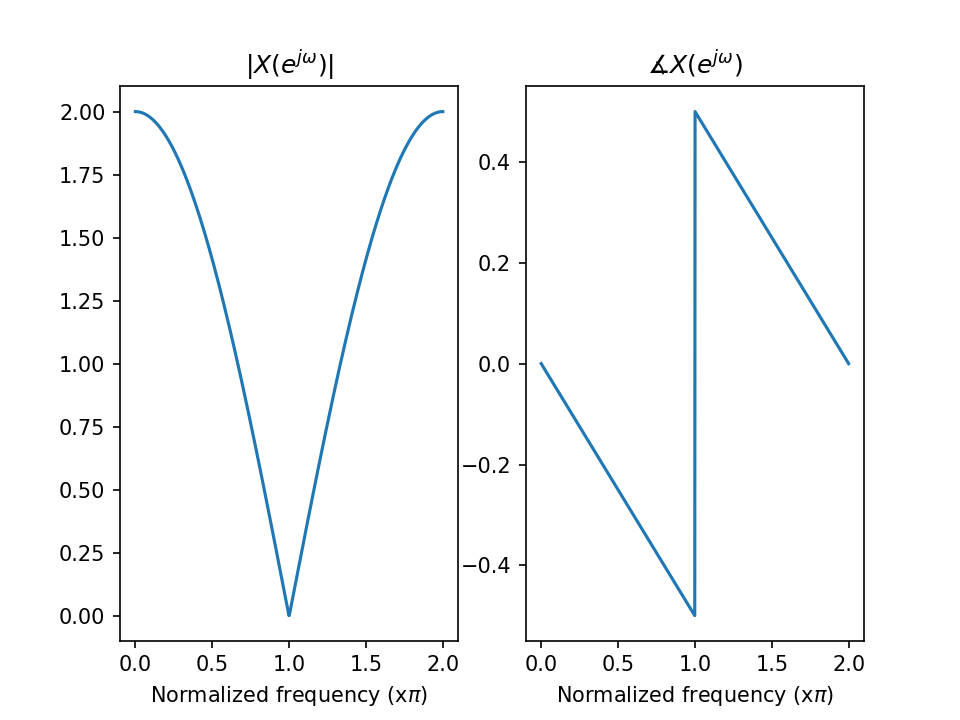

Text(0.5, 0, 'Normalized frequency (x$\\pi$)')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook

w_cont = np.linspace(0,2*np.pi,1000)
X_abs = np.abs(2*np.cos(w_cont/2))
X_phase = np.array([-w_cont/2 if w_cont<np.pi else -w_cont/2+np.pi for w_cont in w_cont])
plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalized frequency (x$\pi$)')
plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase/np.pi)
plt.title('$ \measuredangle X(e^{j\omega})$')
plt.xlabel('Normalized frequency (x$\pi$)')

In [2]:
def dirac(n): 
    if n==0: 
        return 1
    else: 
        return 0

<IPython.core.display.Javascript object>


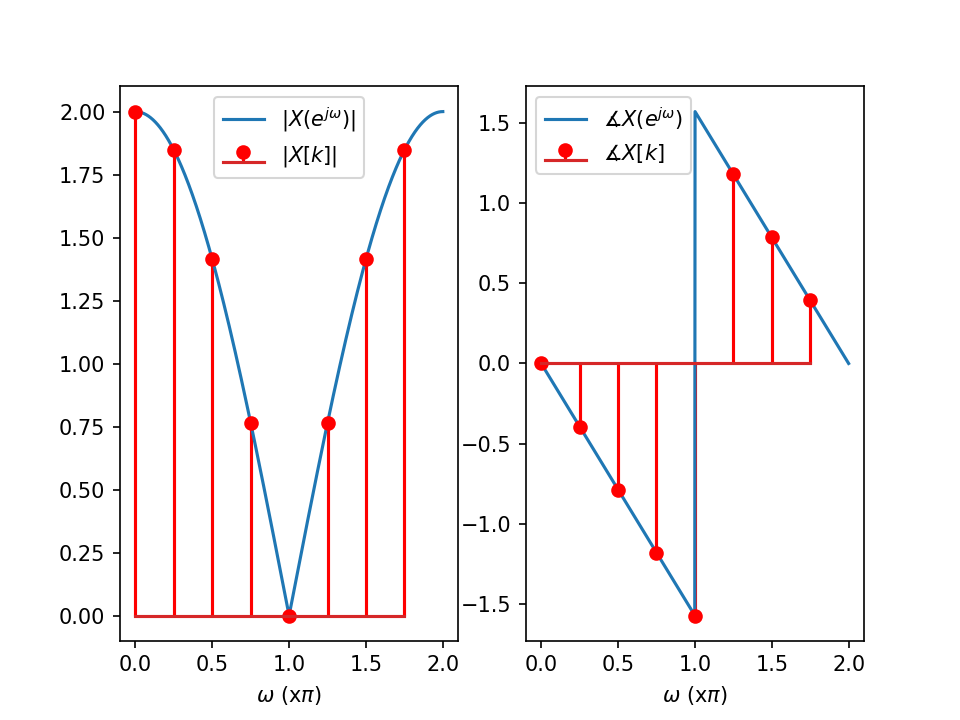

In [3]:
N = 8
X_k = np.zeros([N], dtype = complex)
for k in range(N):
    for n in range(N):
        X_k[k] = X_k[k] + (dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
X_k_abs = np.abs(X_k)
X_k_phase = np.angle(X_k)

plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete = np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,'r-',label='$|X[k]|$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$ \measuredangle X[k]$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

<IPython.core.display.Javascript object>


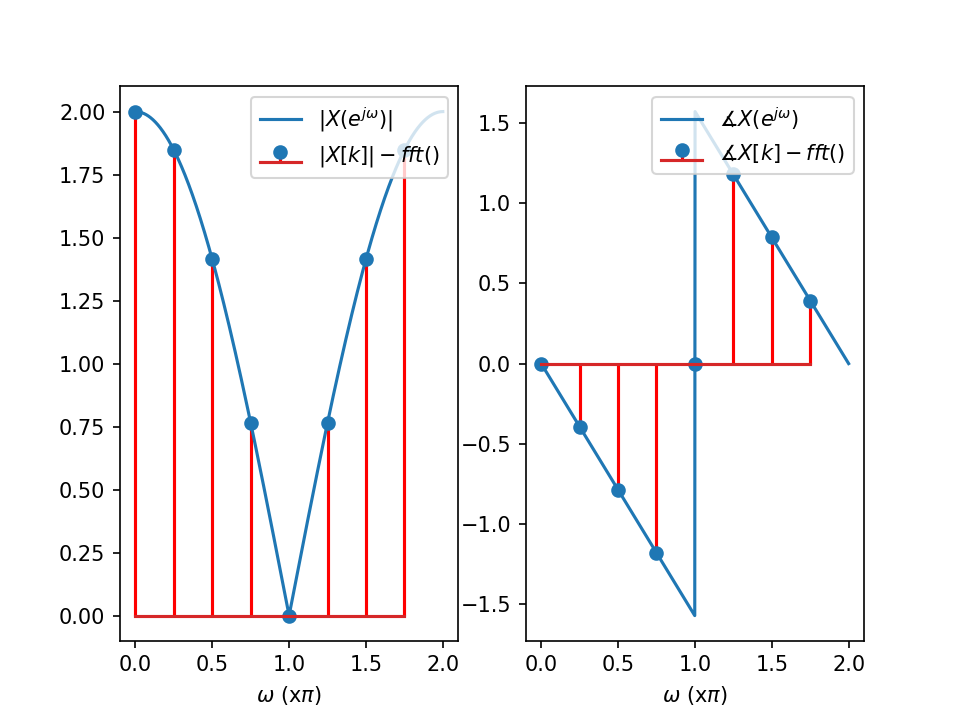

In [4]:
from scipy.fftpack import fft, ifft
x = np.array([1,1])
fft_X = fft(x,8)
abs_fft_X = np.abs(fft_X)
phase_fft_X = np.angle(fft_X)

##Plot graphs
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete = np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft()$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft()$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


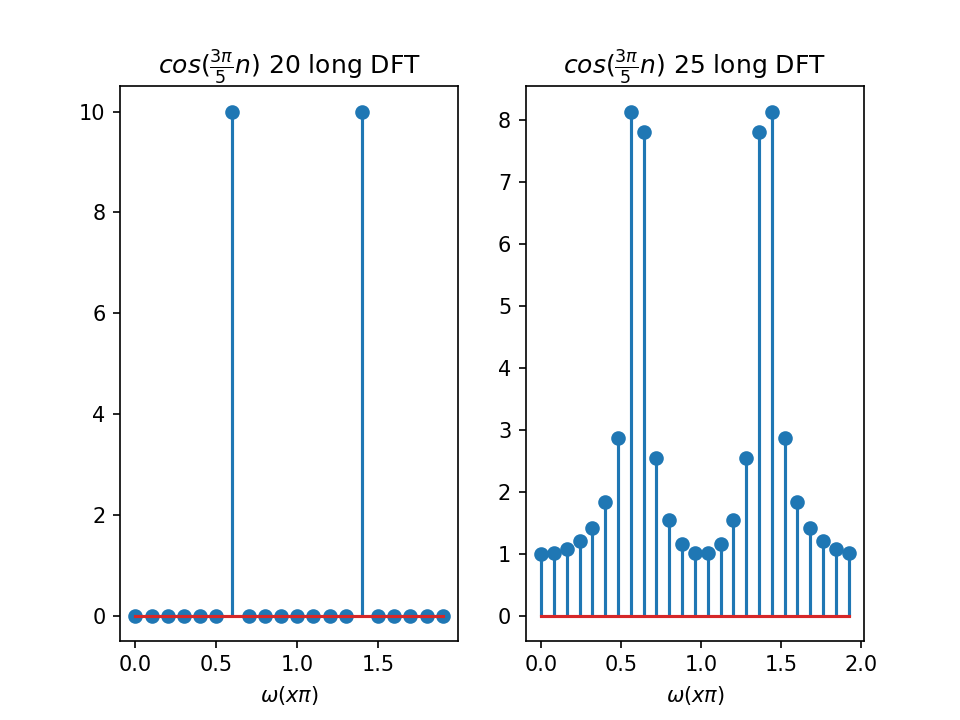

Text(0.5, 1.0, '$cos(\\frac{3\\pi} {5}n)$ 25 long DFT')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
#Length is 20
n1 = np.arange(0,20)
x1 = np.cos(3*np.pi/5*n1)
X1_abs = np.abs(fft(x1))
w_disc_1 = n1*2*np.pi/len(n1) #Between 0-2pi, each step is 2pi/20 (2pi is excluded)
plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi, X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi} {5}n)$ 20 long DFT')

#Length is 25
n2 = np.arange(0,25)
x2 = np.cos(3*np.pi/5*n2)
X2_abs = np.abs(fft(x2))
w_disc_2 = n2*2*np.pi/len(n2) #Between 0-2pi, each step is 2pi/25 (2pi is excluded)
plt.subplot(122)
plt.stem(w_disc_2/np.pi, X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi} {5}n)$ 25 long DFT')

<IPython.core.display.Javascript object>


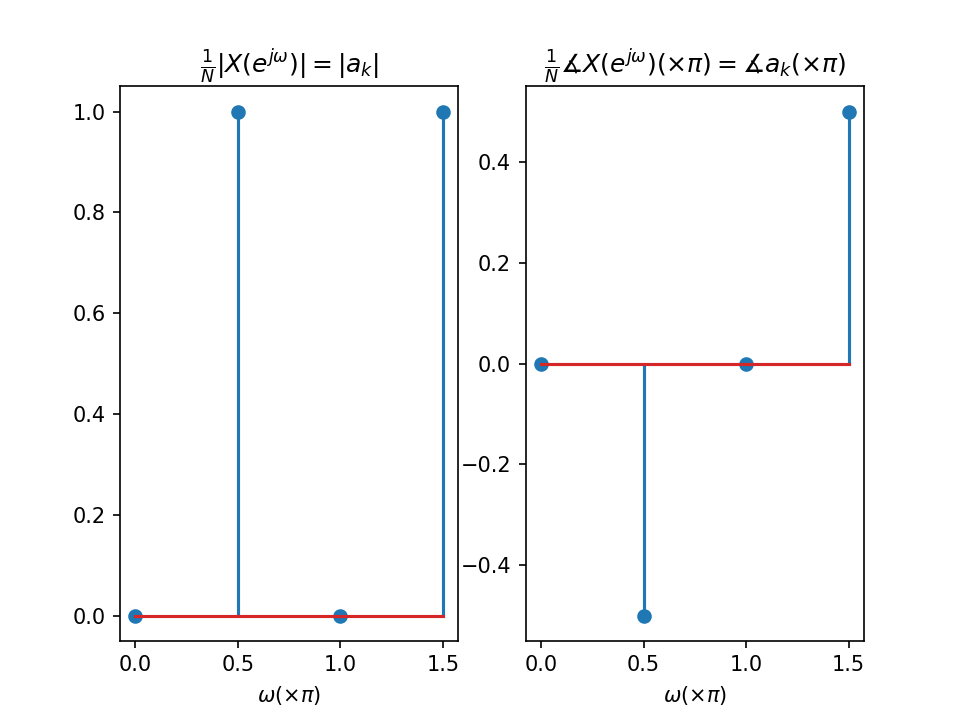

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times \\pi)=\\measuredangle a_k(\\times \\pi)$')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
x = np.array([0,2,0,-2])
N = len(x)
n = np.arange(0,4)
w_disc = n*2*np.pi/N ##Between 0-2pi, each step is 2pi/4 (2pi is excluded)
X_abs = np.abs(fft(x)/N)
X_phase = np.angle(fft(x)/N)
plt.figure()
plt.subplot(121)
plt.stem(w_disc/np.pi, X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi, X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')

In [7]:
n = np.arange(-20,21)
#Method-1
u_n = np.array([0 if i < 0 else 1 for i in n])
#Method-2
u_n = []
for i in n:
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
#Method-3(This is not advised)
u_n = np.concatenate((np.zeros(20),np.ones(21)))
#yol-4
u_n = np.ones(len(n))
u_n[n<0] = 0

In [8]:
n = np.arange(-20,21)
u_n_3 = np.array([0 if i<3 else 1 for i in n]) #u[n-3]

In [9]:
#δ[n]
n = np.arange(-20,21)
dirac_n = np.array([0 if i!=0 else 1 for i in n])

In [10]:
#δ[n+2]
n = np.arange(-20,21)
dirac_n_arti_2 = np.array([0 if i!=-2 else 1 for i in n])

In [11]:
#u[n]-u[n-10]
n = np.arange(-20,21)
u_n_eksi_u_n_10 = np.array([1 if i>=0 and i<10 else 0 for i in n])

# Another exercise

<IPython.core.display.Javascript object>


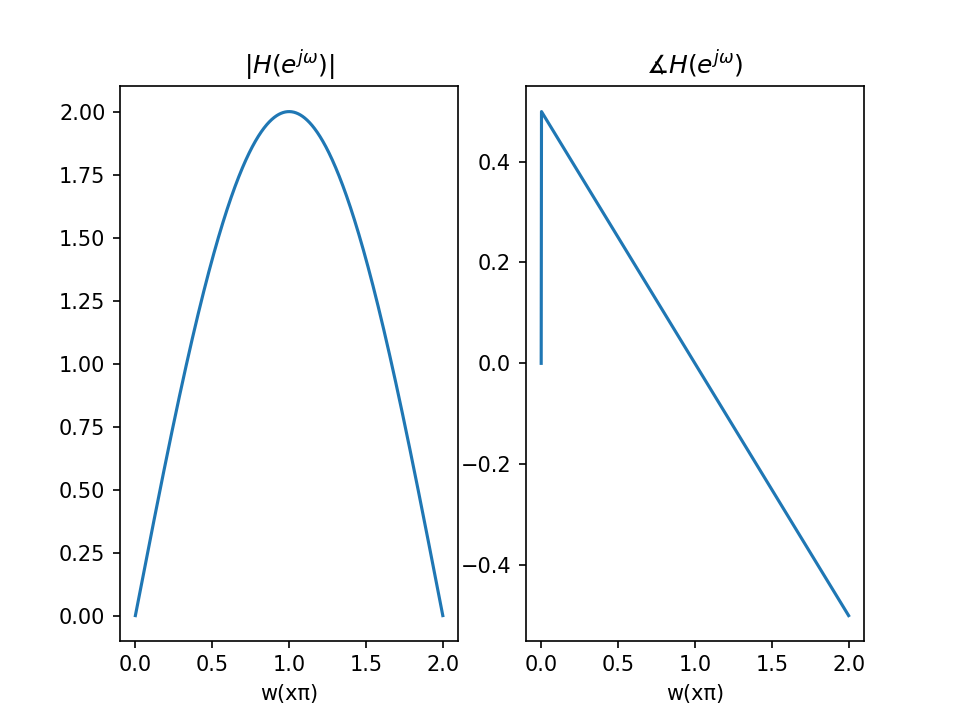

Text(0.5, 1.0, '$ \\measuredangle H(e^{j\\omega})$')

In [12]:
pi = np.pi
w = np.linspace(0,2*pi,1000)
hf = 1-np.exp(-1j*w)
H_fft_abs = np.abs(hf)
H_fft_phase = np.angle(hf)
plt.figure()
plt.subplot(121)
plt.plot(w/pi,H_fft_abs)
plt.xlabel('w(xπ)')
plt.title('$|H(e^{j\omega})|$')
plt.subplot(122)
plt.plot(w/pi, H_fft_phase/pi)
plt.xlabel('w(xπ)')
plt.title('$ \measuredangle H(e^{j\omega})$')

# b) $|H(e^{j\omega})|$ is  High pass filter.

<IPython.core.display.Javascript object>


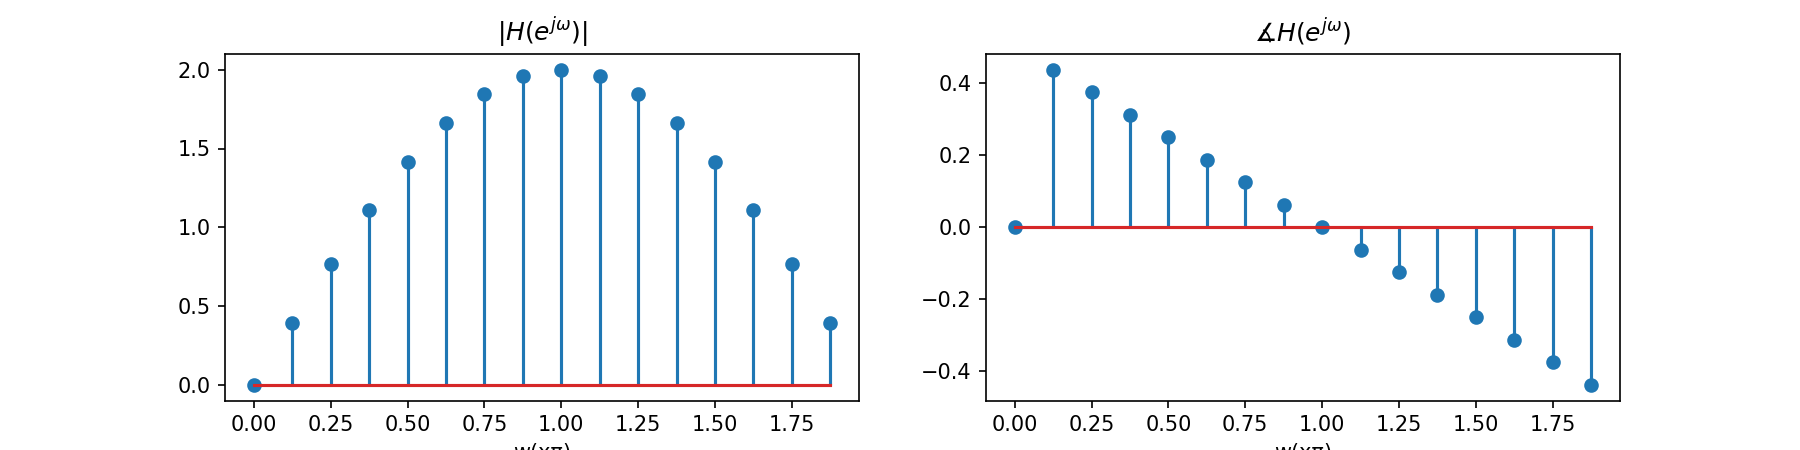

Text(0.5, 1.0, '$ \\measuredangle H(e^{j\\omega})$')

In [13]:
#δ[n]-δ[n-1]
n = np.arange(0,16,1)
w = np.arange(0,16,1) * (2*pi/len(n))
dirac_n = np.array([0 if i!=0 else 1 for i in n])
dirac_n_eksi_1 = np.array([0 if i!=1 else 1 for i in n])
h = dirac_n - dirac_n_eksi_1
hf = fft(h,16)
HF_abs = np.abs(hf)
HF_phase = np.angle(hf)
plt.figure(figsize = (12,3))
plt.subplot(121)
plt.stem(w/pi,HF_abs)
plt.xlabel('w(xπ)')
plt.title('$|H(e^{j\omega})|$')
plt.subplot(122)
plt.stem(w/pi, HF_phase/pi)
plt.xlabel('w(xπ)')
plt.title('$ \measuredangle H(e^{j\omega})$')

<IPython.core.display.Javascript object>


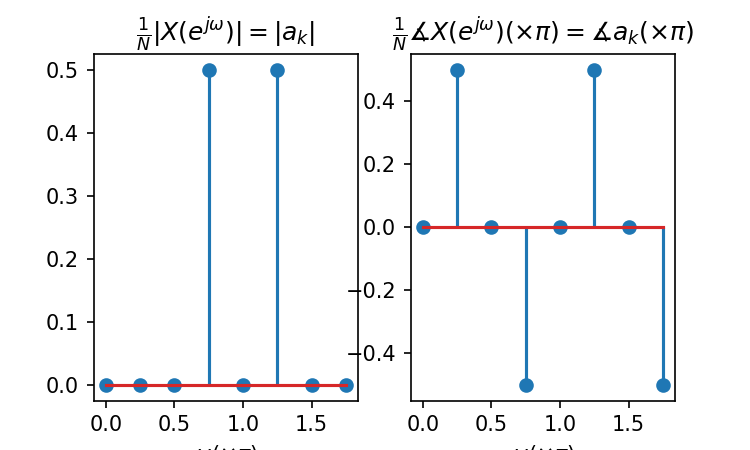

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times \\pi)=\\measuredangle a_k(\\times \\pi)$')

In [14]:
x = np.array([0,0.707106,-1,0.707106,0,-0.707106,1,-0.707106])
N = len(x)
n = np.arange(0,8)
w_disc = n*2*np.pi/N ##Between 0-2pi, each step is 2pi/8 (2pi is excluded)
X_abs = np.abs(fft(x)/N)
X_phase = np.angle(fft(x)/N)

plt.figure(figsize = (5,3))
plt.subplot(121)
plt.stem(w_disc/np.pi, X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi, X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')

# <p> $a3 = |a3|e^{j∠a3} = 0.5e^{-jπ/2}$ <br><br> $a5 = |a3|e^{j∠a5} = 0.5e^{jπ/2}$ <p>

>
 $x[n] = \sum_{k=0}^{N-1}a_ke^{+j2πkn/N} = a_3e^{j0.75πn} + a_5e^{j1.25πn}
        = 0.5e^{-jπ/2}e^{j0.75πn} + 0.5e^{+jπ/2}e^{-j0.75πn}
        = cos(0.75πn - π/2)$


#  $A = 1, \omega = \frac{3π}{4}, 𝜙 = \frac{-π}{2}$


|Hf|= 1.00
Hf angle = 0.33 π


<IPython.core.display.Javascript object>


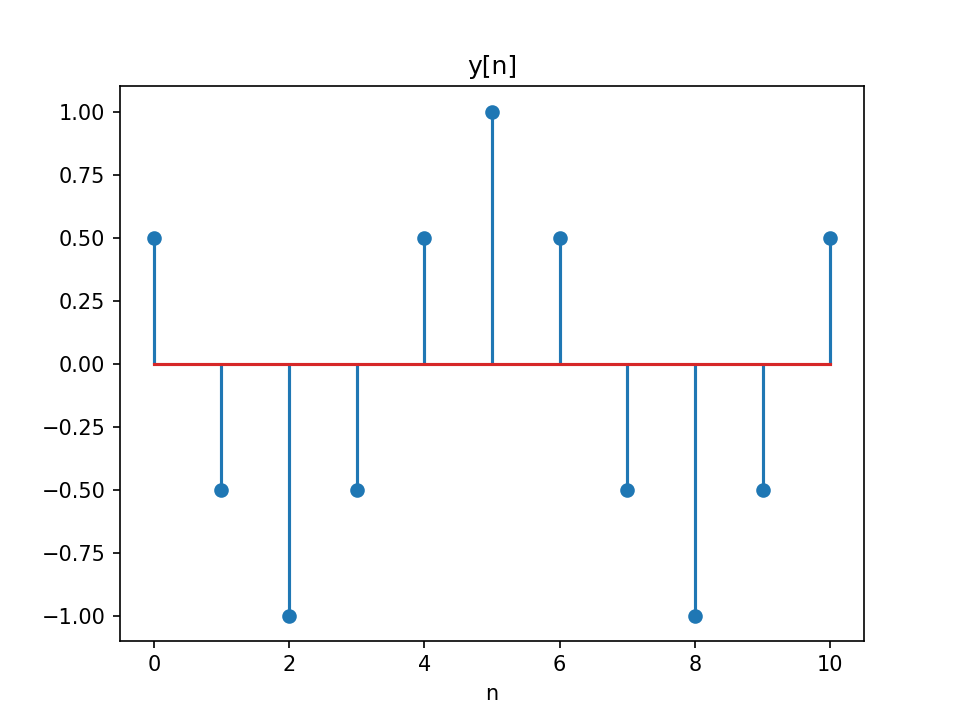

Text(0.5, 0, 'n')

In [15]:
n = np.arange(0,11,1)
hf = 1-np.exp(-1j*pi/3)
hf_abs = np.abs(hf)
hf_phase = np.angle(hf)

yn = hf_abs * np.cos((np.pi/3)*n + hf_phase)

print("|Hf|=" ,format(hf_abs,".2f")) 
print('Hf angle =' ,format(hf_phase/pi,".2f"),"π")

plt.figure()
plt.stem(n,yn)
plt.title('y[n]')
plt.xlabel('n')